# Project 2 - Analyzing Student Performance


We will be using the [UCI ML Student Performance dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance). This dataset collects various attributes from two schools in Portugal and gathers student performance.

In [1]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import sklearn.metrics
import sys
import numpy
from numpy import *
numpy.set_printoptions(threshold=sys.maxsize)


pd.set_option("display.max_rows", 15, "display.max_columns", None)
df_mat = pd.read_csv('student-mat.csv', sep = ';')
df_por = pd.read_csv('student-por.csv', sep = ';')

In [2]:
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [3]:
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


As we can see, there are two datasets here. df_mat is the performance of these students in Math class while df_por is their performance in Portuguese class.

We can start cleaning our data by renaming the columns to be a lot more clear as to what they contain. We will also discard any columns that won't be of use in our exploratory data analysis.

In [4]:
df_por = df_por.rename(columns={"school":"School", "sex":"Sex", "age":"Age","address":"addressType","famsize":"famSize","Pstatus":"parentCohabitation", "Medu":"momEducation", "Fedu":"dadEducation", "Mjob":"momJob","Fjob":"dadJob","reason":"schoolReason","guardian":"Guardian","traveltime":"schoolCommuteTime","studytime":"wklyStudyTime","failures":"pastFailures","schoolsup":"schoolSupport","famsup":"familySupport","paid":"extraPaidClasses","activities":"extraActivities","nursery":"nurserySchool","higher":"pursueHigherEdu","internet":"internetAccess","romantic":"inRelationship","famrel":"familyRelQuality","freetime":"freeTime","goout":"outWithFriends","Dalc":"workdayAlcoholConsumption","Walc":"weekendAlcoholConsumption", "health":"healthStatus","absences":"schoolAbsences", "G1":"firstPeriodGrade", "G2":"secondPeriodGrade", "G3":"finalGrade"})
dfp = df_por.drop(['famSize','parentCohabitation','momJob','dadJob','nurserySchool'], axis=1, inplace=False)
dfp

,School,Sex,Age,addressType,momEducation,dadEducation,schoolReason,Guardian,schoolCommuteTime,wklyStudyTime,pastFailures,schoolSupport,familySupport,extraPaidClasses,extraActivities,pursueHigherEdu,internetAccess,inRelationship,familyRelQuality,freeTime,outWithFriends,workdayAlcoholConsumption,weekendAlcoholConsumption,healthStatus,schoolAbsences,firstPeriodGrade,secondPeriodGrade,finalGrade
0,GP,F,18,U,4,4,course,mother,2,2,0,yes,no,no,no,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,1,1,course,father,1,2,0,no,yes,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,1,1,other,mother,1,2,0,yes,no,no,no,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,4,2,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,3,3,home,father,1,2,0,no,yes,no,no,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,2,3,course,mother,1,3,1,no,no,no,yes,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,3,1,course,mother,1,2,0,no,yes,no,no,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,1,1,course,mother,2,2,0,no,no,no,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,3,1,course,mother,2,1,0,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [5]:
df_mat = df_mat.rename(columns={"school":"School", "sex":"Sex", "age":"Age","address":"addressType","famsize":"famSize","Pstatus":"parentCohabitation", "Medu":"momEducation", "Fedu":"dadEducation", "Mjob":"momJob","Fjob":"dadJob","reason":"schoolReason","guardian":"Guardian","traveltime":"schoolCommuteTime","studytime":"wklyStudyTime","failures":"pastFailures","schoolsup":"schoolSupport","famsup":"familySupport","paid":"extraPaidClasses","activities":"extraActivities","nursery":"nurserySchool","higher":"pursueHigherEdu","internet":"internetAccess","romantic":"inRelationship","famrel":"familyRelQuality","freetime":"freeTime","goout":"outWithFriends","Dalc":"workdayAlcoholConsumption","Walc":"weekendAlcoholConsumption", "health":"healthStatus","absences":"schoolAbsences", "G1":"firstPeriodGrade", "G2":"secondPeriodGrade", "G3":"finalGrade"})
dfm = df_mat.drop(['famSize','parentCohabitation','momJob','dadJob','nurserySchool'], axis=1, inplace=False)

df = dfm.copy()
df.head(10)

,School,Sex,Age,addressType,momEducation,dadEducation,schoolReason,Guardian,schoolCommuteTime,wklyStudyTime,pastFailures,schoolSupport,familySupport,extraPaidClasses,extraActivities,pursueHigherEdu,internetAccess,inRelationship,familyRelQuality,freeTime,outWithFriends,workdayAlcoholConsumption,weekendAlcoholConsumption,healthStatus,schoolAbsences,firstPeriodGrade,secondPeriodGrade,finalGrade
0,GP,F,18,U,4,4,course,mother,2,2,0,yes,no,no,no,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,1,1,course,father,1,2,0,no,yes,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,1,1,other,mother,1,2,3,yes,no,yes,no,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,4,2,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,3,3,home,father,1,2,0,no,yes,yes,no,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,4,3,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,2,2,home,mother,1,2,0,no,no,no,no,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,4,4,home,mother,2,2,0,yes,yes,no,no,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,3,2,home,mother,1,2,0,no,yes,yes,no,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,3,4,home,mother,1,2,0,no,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [6]:
df['School'] = list(map(lambda x: 1 if x == 'GP' else 0, df['School']))
df['Sex'] = list(map(lambda x: 1 if x == 'M' else 0, df['Sex']))
df['addressType'] = list(map(lambda x: 1 if x == 'U' else 0, df['addressType']))
df['schoolReason'] = df['schoolReason'].map({'course': 0, 'home': 1, 'reputation': 2, 'other': 3})
df['Guardian'] = df['Guardian'].map({'mother': 0, 'father': 1, 'other': 2})
df['schoolSupport'] = list(map(lambda x: 1 if x == 'yes' else 0, df['schoolSupport']))
df['familySupport'] = list(map(lambda x: 1 if x == 'yes' else 0, df['familySupport']))
df['extraPaidClasses'] = list(map(lambda x: 1 if x == 'yes' else 0, df['extraPaidClasses']))
df['extraActivities'] = list(map(lambda x: 1 if x == 'yes' else 0, df['extraActivities']))
df['pursueHigherEdu'] = list(map(lambda x: 1 if x == 'yes' else 0, df['pursueHigherEdu']))
df['internetAccess'] = list(map(lambda x: 1 if x == 'yes' else 0, df['pursueHigherEdu']))
df['inRelationship'] = list(map(lambda x: 1 if x == 'yes' else 0, df['pursueHigherEdu']))

In [7]:
df

,School,Sex,Age,addressType,momEducation,dadEducation,schoolReason,Guardian,schoolCommuteTime,wklyStudyTime,pastFailures,schoolSupport,familySupport,extraPaidClasses,extraActivities,pursueHigherEdu,internetAccess,inRelationship,familyRelQuality,freeTime,outWithFriends,workdayAlcoholConsumption,weekendAlcoholConsumption,healthStatus,schoolAbsences,firstPeriodGrade,secondPeriodGrade,finalGrade
0,1,0,18,1,4,4,0,0,2,2,0,1,0,0,0,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,1,1,0,1,1,2,0,0,1,0,0,1,0,0,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,1,1,3,0,1,2,3,1,0,1,0,1,0,0,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,4,2,1,0,1,3,0,0,1,1,1,1,0,0,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,3,3,1,1,1,2,0,0,1,1,0,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,2,2,0,2,1,2,2,0,1,1,0,1,0,0,5,5,4,4,5,4,11,9,9,9
391,0,1,17,1,3,1,0,0,2,1,0,0,0,0,0,1,0,0,2,4,5,3,4,2,3,14,16,16
392,0,1,21,0,1,1,0,2,1,1,3,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,0,1,18,0,3,2,0,0,3,1,0,0,0,0,0,1,0,0,4,4,1,3,4,5,0,11,12,10


In [8]:
x = df.values[:, 0:28]
y = df.values[:, 27]

# print(y)

p_tr, p_te, tar_tr, tar_te = train_test_split(x, y, test_size = 0.25)

print(p_tr.shape)
print(p_te.shape)
print(tar_tr.shape)
print(tar_te.shape)

(296, 28)
(99, 28)
(296,)
(99,)


In [9]:
# x

In [10]:
arr = []

for i in range(1, 20):
    n = KMeans(n_clusters = i, init = 'random', n_init = 10)
    n.fit(p_tr, tar_tr)
    y_p = n.predict(p_te)
#     print(i, accuracy_score(tar_te, y_p, normalize = True))
    arr.append(accuracy_score(tar_te, y_p, normalize = True))

Text(0, 0.5, 'Accuracy')

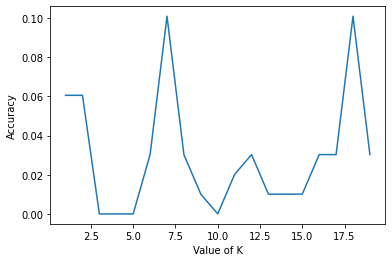

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1, 20),arr)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [12]:
dfp['School'] = list(map(lambda x: 1 if x == 'GP' else 0, dfp['School']))
dfp['Sex'] = list(map(lambda x: 1 if x == 'M' else 0, dfp['Sex']))
dfp['addressType'] = list(map(lambda x: 1 if x == 'U' else 0, dfp['addressType']))
dfp['schoolReason'] = dfp['schoolReason'].map({'course': 0, 'home': 1, 'reputation': 2, 'other': 3})
dfp['Guardian'] = dfp['Guardian'].map({'mother': 0, 'father': 1, 'other': 2})
dfp['schoolSupport'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['schoolSupport']))
dfp['familySupport'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['familySupport']))
dfp['extraPaidClasses'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['extraPaidClasses']))
dfp['extraActivities'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['extraActivities']))
dfp['pursueHigherEdu'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['pursueHigherEdu']))
dfp['internetAccess'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['pursueHigherEdu']))
dfp['inRelationship'] = list(map(lambda x: 1 if x == 'yes' else 0, dfp['pursueHigherEdu']))

In [13]:
x = dfp.values[:, 0:27]
y = dfp.values[:, 27]

p_tr, p_te, tar_tr, tar_te = train_test_split(x, y)

print(p_tr.shape)
print(p_te.shape)
print(tar_tr.shape)
print(tar_te.shape)

(486, 27)
(163, 27)
(486,)
(163,)


In [14]:
arr = []

for i in range(1, 50):
    n = KMeans(n_clusters = i, init = 'random', n_init = 10)
    n.fit(p_tr, tar_tr)
    y_p = n.predict(p_te)
    # print(i, accuracy_score(tar_te, y_p, normalize = True))
    arr.append(accuracy_score(tar_te, y_p, normalize = True))

Text(0, 0.5, 'Accuracy')

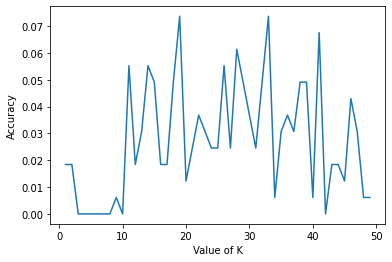

In [15]:
plt.plot(range(1, 50),arr)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")